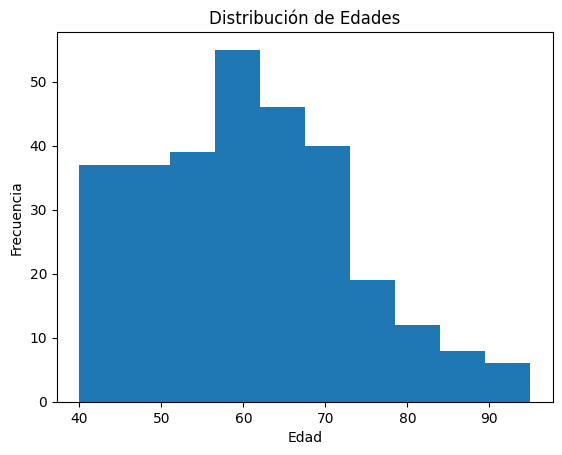

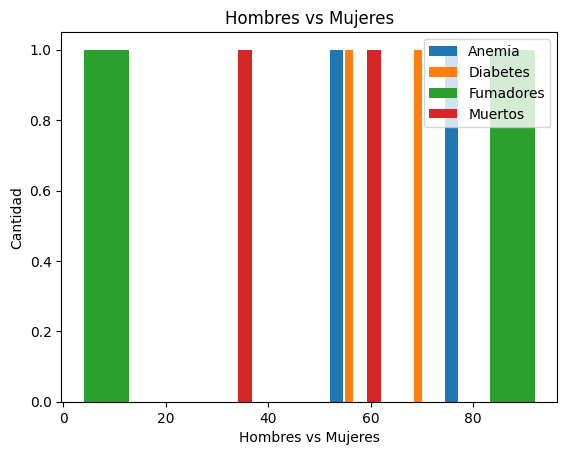

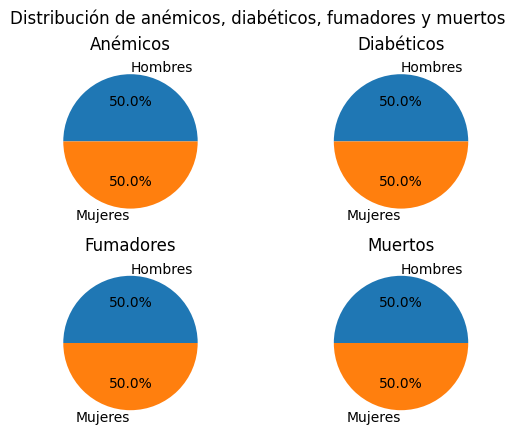

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ej_4_procesar_datos(df: pd.DataFrame) -> pd.DataFrame:
    # Verificar que no existan valores faltantes
    if df.isnull().values.any():
        print("Existen valores faltantes en el dataframe.")

    # Verificar que no existan filas repetidas
    if df.duplicated().any():
        print("Existen filas duplicadas en el dataframe.")

    # Verificar si existen valores atípicos y eliminarlos
    q1 = df["age"].quantile(0.25)
    q3 = df["age"].quantile(0.75)
    iqr = q3 - q1
    df = df[(df["age"] >= q1 - 1.5 * iqr) & (df["age"] <= q3 + 1.5 * iqr)]

    # Crear una columna que categorice por edades
    df["age_category"] = np.where(df["age"] <= 12, "Niño", np.where(df["age"] <= 19, "Adolescente", np.where(df["age"] <= 39, "Joven adulto", np.where(df["age"] <= 59, "Adulto", "Adulto mayor"))))

    # Graficar la distribución de edades con un histograma
    df["age"].plot.hist()
    plt.title("Distribución de Edades")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.show()

    # Graficar histogramas agrupado por hombre y mujer:

    # Hombres = 1
    df_hombres = df[df["sex"] == 1]
    # agrupar el df_hombres por  cantidad de anémicos,cantidad de diabéticos,cantidad de fumadores,cantidad de muertos
    df_hombres_anemia = df_hombres[df_hombres["anaemia"] == 1].count()
    df_hombres_diabetes = df_hombres[df_hombres["diabetes"] == 1].count()
    df_hombres_smoking = df_hombres[df_hombres["smoking"] == 1].count()
    df_hombres_death = df_hombres[df_hombres["DEATH_EVENT"] == 1].count()

    # Mujeres = 0
    df_mujeres = df[df["sex"] == 0]
    # agrupar el df_mujeres por  cantidad de anémicos,cantidad de diabéticos,cantidad de fumadores,cantidad de muertos donde sea igual a 1
    df_mujeres_anemia = df_mujeres[df_mujeres["anaemia"] == 1].count()
    df_mujeres_diabetes = df_mujeres[df_mujeres["diabetes"] == 1].count()
    df_mujeres_smoking = df_mujeres[df_mujeres["smoking"] == 1].count()
    df_mujeres_death = df_mujeres[df_mujeres["DEATH_EVENT"] == 1].count()

    # Graficar histogramas agrupado por hombre y mujer:
    #
    hito_anemia = [df_hombres_anemia["anaemia"], df_mujeres_anemia["anaemia"]]
    hito_diabetes = [df_hombres_diabetes["diabetes"], df_mujeres_diabetes["diabetes"]]
    hito_smoking = [df_hombres_smoking["smoking"], df_mujeres_smoking["smoking"]]
    hito_death = [df_hombres_death["DEATH_EVENT"], df_mujeres_death["DEATH_EVENT"]]

    # Graficar histogramas agrupado por hombre y mujer en una solo grafico
    #
    plt.hist(hito_anemia, label = "Anemia")
    plt.hist(hito_diabetes, label = "Diabetes")
    plt.hist(hito_smoking, label = "Fumadores")
    plt.hist(hito_death, label = "Muertos")
    plt.legend(loc = "upper right")
    plt.title("Hombres vs Mujeres")
    plt.xlabel("Hombres vs Mujeres")
    plt.ylabel("Cantidad")

    plt.show()



    '''
    Usando el mismo DataFrame, realiza una gráfica usando subplots, que contenga gráficas de torta que represente las distribuciones de:

Cantidad de anémicos
Cantidad de diabéticos
Cantidad de fumadores
Cantidad de muertos
La grafica debe verse similar a esta (no es necesario el mismo color)
    '''

    # Graficar tortas
    #
    fig, axs = plt.subplots(2, 2)
    fig.suptitle("Distribución de anémicos, diabéticos, fumadores y muertos")
    axs[0, 0].pie([df_hombres_anemia["anaemia"], df_hombres_anemia["anaemia"]], labels = ["Hombres", "Mujeres"], autopct='%1.1f%%')
    axs[0, 0].set_title("Anémicos")
    axs[0, 1].pie([df_hombres_diabetes["diabetes"], df_hombres_diabetes["diabetes"]], labels = ["Hombres", "Mujeres"], autopct='%1.1f%%')
    axs[0, 1].set_title("Diabéticos")
    axs[1, 0].pie([df_hombres_smoking["smoking"], df_hombres_smoking["smoking"]], labels = ["Hombres", "Mujeres"], autopct='%1.1f%%')
    axs[1, 0].set_title("Fumadores")
    axs[1, 1].pie([df_hombres_death["DEATH_EVENT"], df_hombres_death["DEATH_EVENT"]], labels = ["Hombres", "Mujeres"], autopct='%1.1f%%')
    axs[1, 1].set_title("Muertos")
    plt.show()


    return df

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
# se llama a la funcion
df_procesado = ej_4_procesar_datos(df)